#BML LCA 3

Problem statement: Cardiovascular disease is one of the leading causes of death globally. Early prediction can help in timely diagnosis and treatment.

The of this study is to develop a that can accurately classify whether a patient is likely to have heart disease based on clinical attributes.

Dataset : kaggle uci heart dataset

In [66]:
import pandas as pd

#Read dataset

In [67]:
df=pd.read_csv("/content/heart_disease_uci.csv")

#EDA

In [68]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [70]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [74]:
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [75]:
print("Duplicate values: ")
print(df.duplicated().sum())

Duplicate values: 
0


In [76]:
print("Size of the dataset: ")
print(df.size)

Size of the dataset: 
14720


In [77]:
print(df.shape)

(920, 16)


#Data Preprocessing

In [79]:
col = 'target' if 'target' in df.columns else 'num'
df['target'] = (df[col] > 0).astype(int)

In [80]:
X = df.drop(columns=["target"])
y = df["target"]

In [81]:
X = pd.get_dummies(X, drop_first=True)

Scaling the data using standard scaler

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Train-test split

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, y, test_size=0.2 , random_state=0)

Removes NaN values in the data

In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Model Fitting

In [85]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

#Accuracy of the model

In [86]:
print("Accuracy:", model.score(X_train, Y_train))
print("Test Accuracy:", model.score(X_test, Y_test))

Accuracy: 1.0
Test Accuracy: 1.0


#Data Visulization

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

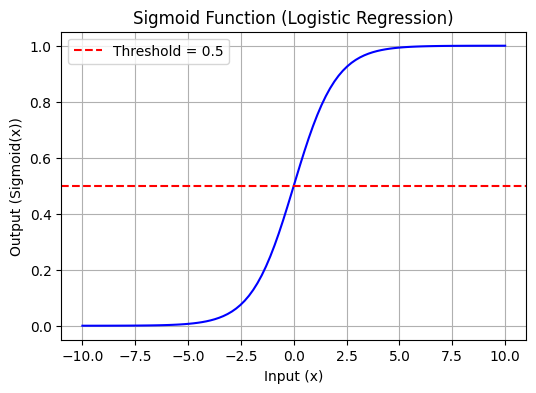

In [90]:
plt.figure(figsize=(6,4))
plt.plot(x, y, color='blue')
plt.title("Sigmoid Function (Logistic Regression)")
plt.xlabel("Input (x)")
plt.ylabel("Output (Sigmoid(x))")

# decision threshold
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()